# Sistemas Dinámicos - Estabilidad, Controlabilidad, Observabilidad
> Gerardo de J. Becerra B.  
> Facultad de Ingeniería, Pontificia Universidad Javeriana.  
> Bogotá, Colombia.

## 1. Estabilidad
Muchos sistemas dinámicos son diseñados para realizar alguna tarea o procesar señales. Si un sistema no es estable éste puede destruirse o saturarse cuando una señal de entrada / disturbio sea aplicado, sin importar lo pequeño que éste sea. Por lo tanto, en la práctica, un sistema inestable no es muy útil, por lo que la estabilidad es un requerimiento práctico para muchos sistemas. Por ésta razón es importante desarrollar métodos para analizar los diferentes tipos de estabilidad de los sistemas.

Dependiendo del tipo de respuesta analizada (estado cero / entrada cero), se consideran a continuación dos tipos de estabilidad: estabilidad externa y estabilidad interna.

### 1.1. Estabilidad Externa
Considere un sistema SISO (single input, single output) lineal, invariante en el tiempo, descrito por la ecuación $$y(t) = \int_0^t g(t-\tau)u(\tau)d\tau$$ donde $g(t)$ es la respuesta impulso del sistema. Se asume que el sistema es causal y que se encuentra inicialmente *relajado* en $t=0$.
Se dice que una entrada $u(t)$ es acotada (bounded) si $u(t)$ no crece indefinidamente, es decir, existe una constante $u_m$ tal que $|u(t)| \leq u_m \le \infty$ para todo $t \leq 0$.
Se dice entonces que un sistema es **BIBO estable** (Bounded input, bounded output) si para toda entrada acotada produce una salida acotada. Dicha estabilidad se define para la respuesta a estado-cero del sistema y se puede aplicar sólo si el sistema se encuentra inicialmente relajado.

---
**Teorema 1:** Un sistema es BIBO estable si y sólo si $g(t)$ es absolutamente integrable en el intervalo $[0,\infty)$
$$\int_0^\infty \left|g(t)\right|dt \leq M < \infty$$ para alguna constante $M$.

---

Cuando el sistema considerado se define en términos de una función de transferencia, la estabilidad BIBO se puede considerar a partir del siguente teorema.

---
**Teorema 2:** Un sistema con función de transferencia racional propia $G(s)$ es BIBO estable si y sólo si todos los polos de $G(s)$ tienen parte real negativa (o se encuentran en el lado izquierdo del semiplano complejo, sin incluir el eje imaginario.

---

#### Ejemplo 1:
Considere el sistema dado por la ecuación diferencial $\ddot{y} + \dot{y} - 2y = \dot{u} - u$. Verifique si el sistema es BIBO estable.

Aplicando la transformada de Laplace, se puede verificar que la función de transferencia del sistema correspondiente es
$$G(s) = \frac{Y(s)}{U(s)} = \frac{s-1}{s^2+s-2}$$
Utilizando Matlab para graficar la respuesta impulso se obtiene:


G =
 
     s - 1
  -----------
  s^2 + s - 2
 
Continuous-time transfer function.



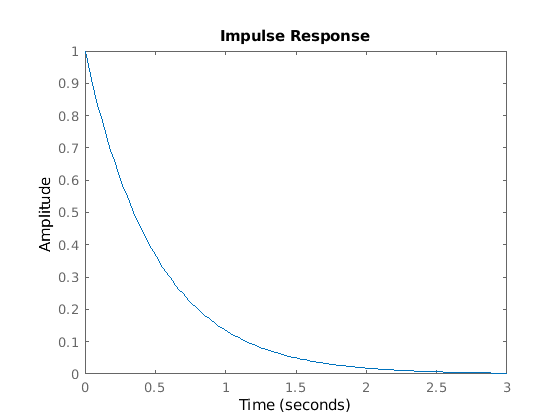

In [1]:
G = tf([1 -1],[1 1 -2])
impulse(G)

Con base en el teorema 1 y por simple inspección de la anterior figura, se puede decir que la respuesta impulso del sistema es absolutamente integrable en $[0,\infty)$, por lo cual se puede afirmar que el sistema es BIBO estable. Ahora, utilizando el teorema 2 se calculan los polos de la función de transferencia:

In [2]:
pole(minreal(G))


ans =

    -2



Como todos los polos tienen parte real negativa, se confirma que el sistema es BIBO estable. En particular, al aplicar un paso a la entrada (señal acotada) se obtiene la siguiente salida acotada:

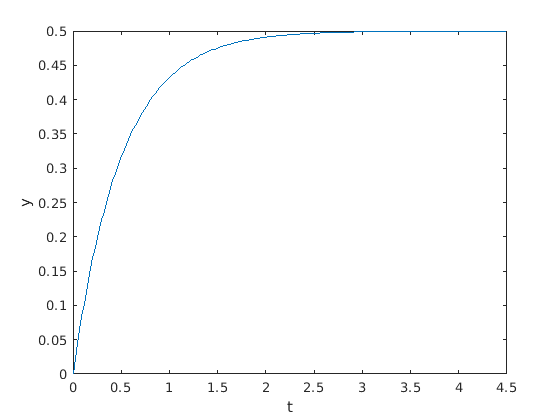

In [3]:
[y,t,x] = step(G);
plot(t,y), xlabel('t'), ylabel('y')

Es importante hacer énfasis en que encontrar que la salida es acotada para algunas entradas acotadas no es suficiente para demostrar la estabilidad BIBO. Es suficiente con encontrar una sóla entrada acotada que sea acotada y produzca una salida no acotada para afirmar que no es BIBO estable.

#### Estabilidad Externa para Sistemas Discretos
De manera análoga, para el caso de sistemas discretos se tienen los siguientes resultados.

---
**Teorema 3:** Un sistema de tiempo discreto es BIBO estable si y sólo si su respuesta impulso $h(k)$ es absolutamente sumable en el intervalo $[0,\infty)$
$$\sum_0^\infty \left|h(k)\right| \leq M < \infty$$ para alguna constante $M$.

---

---
**Teorema 4:** Un sistema de tiempo discreto con función de transferencia racional propia $G(z)$ es BIBO estable si y sólo si todos los polos de $G(z)$ tienen magnitud menor a 1 (se encuentran dentro del circulo unitario en el plano complejo).

---

## 1.2. Estabilidad Interna
La estabilidad interna se estudia para el caso de respuesta a entrada cero. Considerando un sistema lineal, invariante en el tiempo:
$$\dot{x}(t) = A x(t)$$
se desea conocer si el sistema es internamente estable para una condición inicial $x_0$. En la siguiente figura se presentan 3 diferentes condiciones iniciales para el sistema. Intuitivamente, ¿qué podría afirmarse sobre su estabilidad interna?

![stability](img/stability.png)

Se presentan las siguientes definiciones:
1. El sistema es **estable en el sentido de Lyapunov** si todo estado inicial finito genera una respuesta limitada del estado.
2. El sistema es **asintóticamente estable** si todo estado inicial finito genera una respuesta limitada que tiende a cero cuando $t$ tiende al infinito.

![stability_lyapunov](img/stability_Lyapunov.png)

---
**Teorema 5:**
1. El sistema $\dot{x}(t) = A x(t)$ es asintóticamente estable si y sólo si todos los valores propios de $A$ tienen parte real negativa.
2. El sistema $\dot{x}(t) = A x(t)$ es marginalmente estable (Lyapunov estable) si y sólo si todos los valores propios de $A$ tienen parte real cero o negativa, y aquellos con parte real cero son raices simples del polinomio característico de A.
---

#### Ejemplo 1 (continuación):
El sistema definido por la ecuación diferencial $\ddot{y} + \dot{y} - 2y = \dot{u} - u$ puede escribirse en la forma de variables de estado como:

$$
\dot{x} =
\begin{bmatrix}
    0 & 1\\ 2 & -1
\end{bmatrix}x +
\begin{bmatrix}
    0 \\ 1
\end{bmatrix}u
$$
$$
y =
\begin{bmatrix}
    -1 & 1
\end{bmatrix}x
$$
Los valores propios de la matriz $A$ se calculan como

In [4]:
A = [0 1; 2 -1];
eig(A)


ans =

     1
    -2



De éstos valores se puede concluir que el sistema no es asintóticamente ni marginalmente estable. Pero en la primera parte del ejemplo se concluyó que el sistema es BIBO estable. ¿Cómo es posible ésto?
Observe que la función de transferencia del sistema puede escribirse como
$$G(s) = \frac{Y(s)}{U(s)} = \frac{s-1}{s^2+s-2} = \frac{s-1}{(s+2)(s-1)} = \frac{1}{s+2}$$
En éste caso se presenta una cancelación polo/cero, por lo cual no todos los valores propios del sistema corresponden a polos. Por ésta razón el sistema es BIBO estable, pero no internamente estable. Por ejemplo, al calcular la respuesta del sistema ante una condición inicial $x(0) = [1,1]^\intercal$ se tiene :

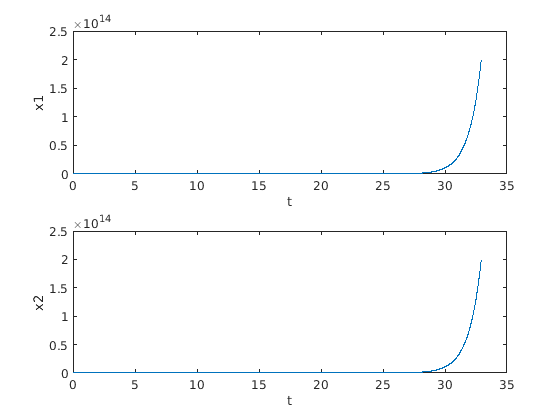

In [5]:
A = [0 1; 2 -1];
B = [0; 1];
C = [-1 1];
D = 0;
sys = ss(A,B,C,D);
[y,t,x] = initial(sys,[1,1]);
subplot(2,1,1), plot(t,x(:,1)), xlabel('t'), ylabel('x1')
subplot(2,1,2), plot(t,x(:,2)), xlabel('t'), ylabel('x2')

En general, se tiene que el conjunto de polos de $G(s)$ es un subconjunto de valores propios de $A$. Por lo tanto, se puede afirmar :
1. Si el sistema es asintóticamente estable, entonces el sistema es BIBO estable.
2. Si el sistema es BIBO estable, el sistema no necesariamente será asintóticamente estable.
3. Si el sistema no es asintóticamente estable, no se puede hacer afirmación alguna sobre su estabilidad BIBO.

#### Estabilidad Interna para Sistemas Discretos
De manera análoga, para el caso de sistemas discretos se tiene el siguiente resultado:

---
**Teorema 6:**
1. El sistema de tiempo discreto $x(k+1) = A x(k)$ es asintóticamente estable si y sólo si todos los valores propios de $A$ tienen magnitud menor a 1.
2. El sistema de tiempo discreto $x(k+1) = A x(k)$ es marginalmente estable (Lyapunov estable) si y sólo si todos los valores propios de $A$ tienen magnitud menor o igual a 1, y aquellos con magnitud igual a 1 son raices simples del polinomio característico de A.
---

## 2. Controlabilidad y Observabilidad
La controlabilidad se relaciona con si es posible o no que el estado de un sistema sea controlado desde la entrada, mientras que la observabilidad se relaciona con si es posible o no que el estado inicial pueda observarse desde la salida. Éstos conceptos se pueden ilustrar en la siguiente figura: ¿Es posible afectar los voltajes de los capacitores desde la entrada $u$? ¿Es posible observar las condiciones iniciales de los voltajes desde la salida $y$?

![ctrb_obsv_circuit](img/ctrb_obsv_circuit.png)

Note que, dado que en la salida $y$ existe un circuito abierto, la entrada no tiene ningún efecto sobre $x_2$. Por lo tanto éste estado no es controlable.

Note también que la corriente que pasa a través de la resistencia de $2\Omega$ siempre es igual a la de la fuente de corriente $u$, por lo cual la respuesta excitada por el estado inicial $x_1$ no aparecerá en $y$. Por lo tanto el estado inicial $x_1(0)$ no puede observarse desde la salida.

### 2.1 Controlabilidad
Considere el sistema $n$-dimensional con $p$ entradas $\dot{x} = Ax + Bu$. Dado que la salida no juega ningún papel respecto a la controlabilidad, no se considerará la ecuación de salida.

---
**Definición 1:** La ecuación de estado $\dot{x} = Ax + Bu$ o el par $(A,B)$ es controlable si para cualquier estado inicial $x(0) = x_0$ y cualquier estado final $x_1$, existe una entrada que transfiere $x_0$ a $x_1$ en un tiempo finito. De lo contrario se dice que es no controlable.

---

Ésta definición requiere sólo que la entrada sea capaz de llevar cualquier estado en el espacio de estados a cualquier otro estado en tiempo finito; no se especifica cuál trayectoria debe seguirse. Tampoco se especifica ninguna restricción a la entrada: su magnitud puede ser tan grande como sea necesario.

#### Ejemplo 2:
Considere los siguientes circuitos. Para cada uno, indique si las variables de estado pueden manipularse desde la entrada.

![ctrb_circuits](img/ctrb_circuits.png)

---
**Teorema 7:** Las siguientes afirmaciones son equivalentes:
1. El par $n$-dimensional $(A,B)$ es controlable.
2. La matriz de controlabilidad $$\mathfrak{C} = [B\ AB\ A^2B\ \dots A^{n-1}B]$$ de dimensiones $n \times np$ tiene rango $n$ (rango completo).
3. La matriz $n \times n$ $$W_c(t) = \int_0^t e^{A\tau}B B^\intercal e^{A^\intercal \tau}d\tau$$ es no-singular para cualquier $t > 0$. La matriz $W_c(t)$ se conoce como el gramiano (limitado en tiempo) de controlabilidad.

---

#### Ejemplo 3:
![ctrb_platform](img/ctrb_platform.png)

Considere el sistema de plataforma con amortiguamiento mostrado en la figura. Se asume que la masa de la plataforma es cero, por lo que los movimientos de los dos extremos son independientes y la mitad de la fuerza se aplica en cada lado. Se asume que las constantes de fricción son igual a 2 y 1 en los lados izquierdo y derecho, respectivamente, mientras que las constantes de los resortes son iguales a 1. Seleccionando los desplazamientos de los dos extremos de la plataforma como variables de estado se obtiene el siguiente modelo en variables de estado:

$$\dot{x} =
\begin{bmatrix}
    -0.5 & 0 \\ 0 & -1
\end{bmatrix}x +
\begin{bmatrix}
    0.5 \\ 1
\end{bmatrix}u
$$

Determine si el sistema es controlable.

Usando Matlab es muy fácil verificar si se cumple la condición 2 del teorema 7:

In [6]:
A = [-0.5 0; 0 -1];
B = [0.5; 1];
CM = [B A*B]
rank(CM)


CM =

    0.5000   -0.2500
    1.0000   -1.0000


ans =

     2



Como la matriz de controlabilidad es de rango completo, se puede afirmar que el sistema es controlable. La matriz de controlabilidad puede calcularse directamente en Matlab usando la función `ctrb`:

In [7]:
ctrb(A,B)


ans =

    0.5000   -0.2500
    1.0000   -1.0000



Ahora que ya se sabe que el sistema es controlable, ¿cómo puede diseñarse una entrada $u$ para llevar el sistema desde cualquier estado inicial $x(0)$ hasta un estado $x_1$?

---
**Teorema 8:** Para cualquier estado inicial $x(0) = x_0$ y cualquier estado final $x(t_1) = x_1$, la entrada $$u(t) = -B^\intercal e^{A^\intercal(t_1-t)}W_c^{-1}(t_1)\left[e^{A t_1}x_0 - x_1\right]$$ transferirá $x_0$ a $x_1$ en el tiempo $t_1$.

---

#### Ejemplo 3 (continuación):
Asuma que para el sistema de plataforma amortiguada se tiene $x_1(0) = 10$ y $x_2(0) = -1$. ¿Es posible aplicar una fuerza para llevar la plataforma al equilibrio en $2$ segundos?

Usando Matlab es posible calcular de manera analítica la señal de control $u(t)$ requerida. En primer lugar se define el sistema:

In [8]:
A = [-0.5 0; 0 -1]
B = [0.5; 1]
C = eye(2);
D = [0;0];
sys = ss(A,B,C,D);


A =

   -0.5000         0
         0   -1.0000


B =

    0.5000
    1.0000



Se definen la condición inicial, la condición final y el tiempo deseado:

In [9]:
x0 = [10; -1];
x1 = [0; 0];
t1 = 2;

El gramiano de controlabilidad $W_c$ evaluado en el tiempo $t_1$ se puede calcular como:

In [10]:
syms t tau
Wc_t1 = int(expm(A*tau)*(B*B')*expm(A'*tau),tau,0,t1)
Wc_t1 = eval(Wc_t1)

 
Wc_t1 =
 
[ 1/4 - exp(-2)/4, 1/3 - exp(-3)/3]
[ 1/3 - exp(-3)/3, 1/2 - exp(-4)/2]
 

Wc_t1 =

    0.2162    0.3167
    0.3167    0.4908



Ahora, se calcula la señal de control $u(t)$ como:

In [11]:
u_t = -B'*expm(A'*(t1-t))*Wc_t1^(-1)*(expm(A*t1)*x0 - x1)

 
u_t =
 
(130966500866847082641101309890775*exp(t - 2))/633825300114114700748351602688 - (405370849847986384269510134363975*exp(t/2 - 1))/2535301200456458802993406410752
 


Ahora, como ya se calculó la señal de control $u(t)$ requerida, se puede obtener la respuesta del sistema como:

In [12]:
u_tau = subs(u_t,t,tau);
x_t = expm(A*t)*x0 + int(expm(A*(t-tau))*B*u_tau,tau,0,t)

 
x_t =
 
 10*exp(-t/2) + (130966500866847082641101309890775*exp(t - 2))/1901475900342344102245054808064 - (130966500866847082641101309890775*exp(- t/2 - 2))/1901475900342344102245054808064 - (405370849847986384269510134363975*exp(- t/2 - 1)*(exp(t) - 1))/5070602400912917605986812821504
 (130966500866847082641101309890775*exp(t - 2))/1267650600228229401496703205376 - exp(-t) - (130966500866847082641101309890775*exp(- t - 2))/1267650600228229401496703205376 - (405370849847986384269510134363975*exp(-t)*exp(-1)*(exp((3*t)/2) - 1))/3802951800684688204490109616128
 


Definiendo un vector de tiempos $t$ en el intervalo $[0,t_1]$ y graficando se obtiene la respuesta del sistema:

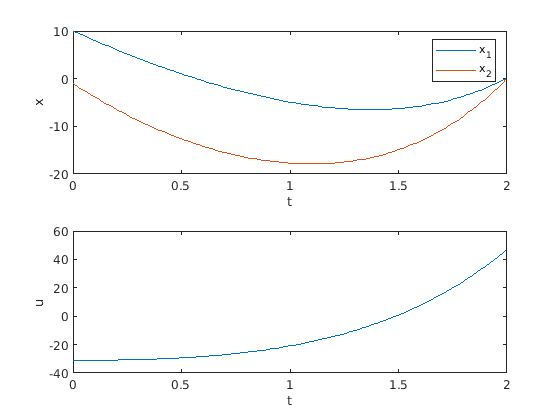

In [13]:
t = linspace(0,t1,101);
u = eval(u_t);
x = eval(x_t);
subplot(2,1,1), plot(t,x), xlabel('t'), ylabel('x'), legend('x_1','x_2')
subplot(2,1,2), plot(t,u), xlabel('t'), ylabel('u')

Note que las respuestas obtenidas también se pueden obtener usando la función `lsim` de Matlab.

#### Ejercicio 1:
Para el sistema de la plataforma amortiguada, asuma que todos los coeficientes de fricción y amortiguamiento son iguales a 1. ¿Es el sistema controlable en éste caso?

#### Ejercicio 2:
Para cada uno de los circuitos del ejemplo 2, formule el modelo en variables de estado y verifique la controlabilidad del sistema.

### 2.2 Observabilidad
El concepto de observabilidad es **dual** al de controlabilidad. En términos generales, la controlabilidad estudia la posibilidad de manejar los estados desde la entrada; observabilidad estudia la posibilidad de estimar el estado desde la salida. Considere la ecuación de estado para el sistema $n$-dimensional con $p$ entradas y $q$ salidas
$$
\begin{align}
    \dot{x} &= Ax + Bu\\
    y &= Cx + Du
\end{align}
$$

---
**Definición 2:** La ecuación de estado anterior o el par $(A,C)$ es observable si para cualquier estado inicial $x(0)$ desconocido existe un tiempo finito $t_1 > 0$ tal que el conocimiento de la entrada $u$ y de la salida $y$ durante el intervalo $[0,t_1]$ es suficiente para determinar de manera única el estado inicial $x(0)$. De lo contrario se dice que el sistema es no observable.

---

#### Ejemplo 4:
Considere los siguientes circuitos. Para cada uno, indique si las variables de estado pueden observarse desde la salida.

![obsv_circuits](img/obsv_circuits.png)

---
**Teorema 8:** Las siguientes afirmaciones son equivalentes:
1. El par $n$-dimensional $(A,C)$ es observable.
2. La matriz de observabilidad
$$
\mathbb{O} =
\begin{bmatrix}
    C\\ CA\\ \vdots \\ CA^{n-1}
\end{bmatrix}
$$
de dimensiones $nq \times n$ tiene rango $n$ (rango completo).
3. La matriz $n \times n$ $$W_o(t) = \int_0^t e^{A^\intercal \tau}C^\intercal C e^{A \tau}$$ es no-singular para cualquier $t > 0$. La matriz $W_o(t)$ se conoce como el gramiano (limitado en tiempo) de observabilidad.

---

#### Ejemplo 3 (continuación):
Considere nuevamente el sistema de plataforma amortiguada. Asuma que se cuenta con un sensor que genera una medición $y = x_1 + x_2$. Determine si el sistema es observable.

Usando Matlab se definen las matrices del sistema como:

In [14]:
A = [-0.5 0; 0 -1];
B = [0.5; 1];
C = [1 1];
D = 0;
sys = ss(A,B,C,D);

La matriz de observabilidad se calcula como

In [15]:
OM = [C; C*A]
rank(OM)


OM =

    1.0000    1.0000
   -0.5000   -1.0000


ans =

     2



Como se obtiene una matriz de observabilidad de rango completo, se puede afirmar que el sistema es observable. La matriz de observabilidad se puede calcular directamente usando la función `obsv` de Matlab:

In [16]:
obsv(A,C)


ans =

    1.0000    1.0000
   -0.5000   -1.0000



Ahora que ya se sabe que el sistema es observable, ¿cómo puede calcularse el estado inicial $x(0)$ dado que se conoce la evolución de $u$ y $y$ para el intervalo de tiempo $[0,t_1]$?

---
**Teorema 9:** Sean la entrada $u(t)$ y la salida $y(t)$ conocidas en el intervalo $[0,t_1]$. La condición inicial $x(0)$ puede calcularse como
$$x(0) = W_o^{-1}(t_1) \int_0^{t_1} e^{A^\intercal t}C^\intercal \bar{y}(t)$$
donde
$$\bar{y}(t) = y(t) - C \int_0^t e^{A(t-\tau)}B u(\tau) d\tau + Du(t)$$

---

#### Ejemplo 3 (continuación):
Asuma ahora que la entrada $u(t)$ corresponde a la señal calculada usando el gramiano de controlabilidad en la sección anterior. Verifique que el estado inicial corresponda a $x_1(0) = 10$ y $x_2(0) = -1$.

A partir de la entrada $u(t)$ se puede calcular la salida del sistema como:

 
y_t =
 
10*exp(-t/2) - exp(-t) + (654832504334235413205506549453875*exp(t - 2))/3802951800684688204490109616128 - (130966500866847082641101309890775*exp(- t - 2))/1267650600228229401496703205376 - (130966500866847082641101309890775*exp(- t/2 - 2))/1901475900342344102245054808064 - (405370849847986384269510134363975*exp(- t/2 - 1)*(exp(t) - 1))/5070602400912917605986812821504 - (405370849847986384269510134363975*exp(-t)*exp(-1)*(exp((3*t)/2) - 1))/3802951800684688204490109616128
 


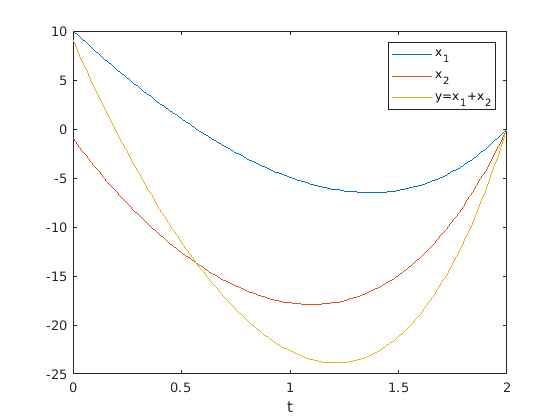

In [17]:
syms t tau
y_t = C*expm(A*t)*x0 + C*int(expm(A*(t-tau))*B*u_tau,tau,0,t) + D*u_t
t = linspace(0,t1,101);
y = eval(y_t);
plot(t,x,t,y), xlabel('t'), legend('x_1','x_2','y=x_1+x_2')


Entonces, asumiendo que $u(t)$ es conocido y $y(t)$ se midió directamente, se puede calcular el gramiano de observabilidad como:

In [18]:
Wo_t1 = int(expm(A'*tau)*(C'*C)*expm(A'*tau),tau,0,t1)
Wo_t1 = eval(Wo_t1)

 
Wo_t1 =
 
[         1 - exp(-2), 2/3 - (2*exp(-3))/3]
[ 2/3 - (2*exp(-3))/3,     1/2 - exp(-4)/2]
 

Wo_t1 =

    0.8647    0.6335
    0.6335    0.4908



Ahora, usando el teorema 9 se calcula la condición inicial:

In [19]:
syms t tau
ybar_t = y_t - C*int(expm(A*(t-tau))*B*u_tau,tau,0,t);
xo0 = double(Wo_t1^(-1)*int(expm(A'*t)*C'*ybar_t,t,0,t1))


xo0 =

   10.0000
   -1.0000



Se verifica entonces que es posible recuperar el estado inicial a partir de la información dada por $u(t)$ y $y(t)$ en el intervalo de tiempo considerado.

#### Ejercicio 3:
Para el sistema de la plataforma amortiguada, asuma que el sensor produce la señal de salida $y = x_1$. Determine si el sistema es observable.

#### Ejercicio 4:
Para cada uno de los circuitos del ejemplo 4, formule el modelo en variables de estado y verifique la observabilidad del sistema.

## References
- Chi-Tsong, C. [Linear System Theory and Design](https://books.google.com.co/books?isbn=0195117778). 3rd Edition. Oxford University Press, 1999.
- Bay, J.S. [Fundamentals of Linear State Space Systems](https://books.google.com.co/books?isbn=0256246394). 1st Edition. WCB/McGraw-Hill, 1999.